# Exploring Factors Contributing to the Suicide Rate

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import linregress
import dataframe_image as dfi
import numpy as np
import statsmodels.formula.api as smf  

## Data

Suicide Mortality Rate (2000-2019) = https://ourworldindata.org/grapher/suicide-mortality-rate?tab=chart

Suicide Mortality Rate by Age (1990-2019) = https://ourworldindata.org/grapher/suicide-death-rate-by-age?country=~OWID_WRL

Suicide Mortality Rate by Sex (1990-2019) = https://ourworldindata.org/grapher/suicide-death-rates-by-sex

Population: https://ourworldindata.org/grapher/population-past-future

GDP per capita = https://ourworldindata.org/grapher/gdp-per-capita-worldbank?tab=chart

Unemployment Rate = https://ourworldindata.org/grapher/unemployment-rate?country=CAF~NLD~BGD~USA~CAN~COL~SWE~CHN

Life Satisfaction = https://ourworldindata.org/grapher/happiness-cantril-ladder?tab=chart

Number of People with Depression = https://ourworldindata.org/grapher/number-with-depression-by-country?tab=chart

In [2]:
# Loading and cleaning data

## Suicide mortality rate (2000-2019)
suicide = pd.read_csv("data/suicide-mortality-rate.csv")
suicide = suicide.dropna()
suicide["Year"] = pd.to_datetime(suicide["Year"], format="%Y")

## Suicide mortality rate by age (1990-2019)
suicide_by_age = pd.read_csv("data/suicide-death-rate-by-age.csv")
suicide_by_age = suicide_by_age.dropna()
suicide_by_age.columns = ["Entity", "Code", "Year", "All Ages", "70+ years", "50-69 years", "15-49 years", "5-14 years", "Age-standardized"]
suicide_by_age = suicide_by_age.drop(["All Ages"], axis=1)

## Suicide mortality rate by sex (1990-2019)
suicide_by_sex = pd.read_csv("data/suicide-death-rates-by-sex.csv")
suicide_by_sex = suicide_by_sex.dropna()
suicide_by_sex.columns = ["Entity", "Code", "Year", "Female", "Male", "Both Sex"]

## Population
population = pd.read_csv("data/population-past-future.csv")
population.columns = ["Entity", "Code", "Year", "Population"]

## GDP per capita
GDP = pd.read_csv("data/gdp-per-capita-worldbank.csv")
GDP = GDP.dropna()
GDP.columns = ["Entity", "Code", "Year", "GDP per capita"]
GDP["Year"] = pd.to_datetime(GDP["Year"], format="%Y")

## Unemployment Rate
unemploy = pd.read_csv("data/unemployment-rate.csv")
unemploy.columns = ["Entity", "Code", "Year", "Unemployment Rate"]
unemploy["Year"] = pd.to_datetime(unemploy["Year"], format="%Y")

## Life Satisfaction
happy = pd.read_csv("data/happiness-cantril-ladder.csv")
happy.columns = ["Entity", "Code", "Year", "Life Satisfaction"]
happy["Year"] = pd.to_datetime(happy["Year"], format="%Y")

## Number of People with Depression
depression = pd.read_csv("data/number-with-depression-by-country.csv")
depression.columns = ["Entity", "Code", "Year", "Depression"]
depression["Year"] = pd.to_datetime(depression["Year"], format="%Y")

## Q1: How did the suicide mortality rate change from 2000-2019 (Time-series analysis)?

In [3]:
# Calculating the average world suicide mortality rate for each year
avg_suicide = suicide[["Year", "Suicide mortality rate (per 100,000 population)"]].groupby("Year").mean()
avg_suicide = avg_suicide.reset_index()

# Getting U.S. suicide mortality rate for each year
US_suicide = suicide[suicide["Entity"] == "United States"]

# Getting China suicide mortality rate for each year
China_suicide = suicide[suicide["Entity"] == "China"]

# Getting Germany suicide mortality rate for each year
Germany_suicide = suicide[suicide["Entity"] == "Germany"]

# Getting Kenya suicide mortality rate for each year
Kenya_suicide = suicide[suicide["Entity"] == "Kenya"]

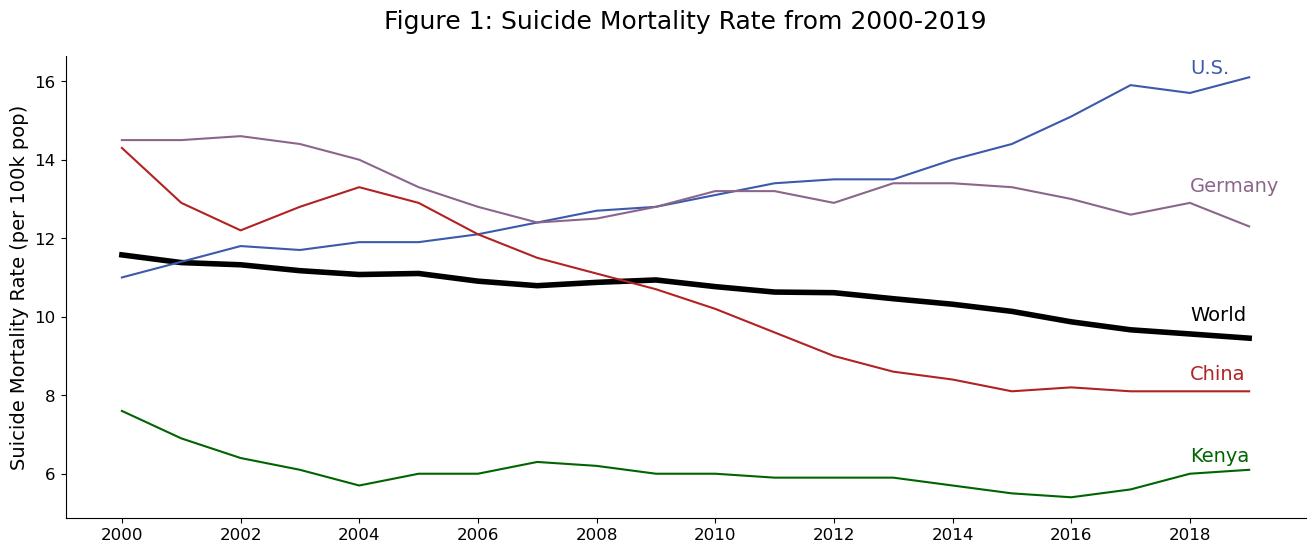

In [4]:
# Plotting
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(avg_suicide["Year"], avg_suicide["Suicide mortality rate (per 100,000 population)"], color="black", linewidth=4)
ax.plot(US_suicide["Year"], US_suicide["Suicide mortality rate (per 100,000 population)"], color="#3D59AB", linewidth=1.5)
ax.plot(China_suicide["Year"], China_suicide["Suicide mortality rate (per 100,000 population)"], color="firebrick", linewidth=1.5)
ax.plot(Germany_suicide["Year"], Germany_suicide["Suicide mortality rate (per 100,000 population)"], color="#8B668B", linewidth=1.5)
ax.plot(Kenya_suicide["Year"], Kenya_suicide["Suicide mortality rate (per 100,000 population)"], color="#006400", linewidth=1.5)

ax.text(pd.to_datetime("2018-01-01"), 16.2, 'U.S.', size=14, color="#3D59AB")
ax.text(pd.to_datetime("2018-01-01"), 13.2, 'Germany', size=14, color="#8B668B")
ax.text(pd.to_datetime("2018-01-01"), 9.9, 'World', size=14, color="black")
ax.text(pd.to_datetime("2018-01-01"), 8.4, 'China', size=14, color="firebrick")
ax.text(pd.to_datetime("2018-01-01"), 6.3, 'Kenya', size=14, color="#006400")

plt.xticks(fontsize=12)
ax.set_ylabel('Suicide Mortality Rate (per 100k pop)', fontsize=14)
plt.yticks(fontsize=12)
ax.set_title('Figure 1: Suicide Mortality Rate from 2000-2019', fontsize=18, pad=20)

sns.despine()

plt.savefig('figure/Figure 1.svg', bbox_inches = 'tight')

## Q2: How did the world average suicide mortality rate change by sex from 2000-2017?

In [5]:
# Calculating the average world suicide mortality rate by sex for each year
avg_suicide_by_sex = suicide_by_sex[["Year", "Female", "Male", "Both Sex"]].groupby("Year").mean()
avg_suicide_by_sex = avg_suicide_by_sex.reset_index()
avg_suicide_by_sex = avg_suicide_by_sex.iloc[10:]
avg_suicide_by_sex = avg_suicide_by_sex.drop(["Both Sex"], axis=1)
avg_suicide_by_sex

,Year,Female,Male
10,2000,6.211237,19.667423
11,2001,6.069794,19.537216
12,2002,5.978454,19.367474
13,2003,5.906340,19.189897
14,2004,5.811495,18.959897
15,2005,5.718763,18.821804
16,2006,5.569072,18.554072
17,2007,5.451856,18.328711
18,2008,5.365309,18.112577
19,2009,5.257887,17.805773


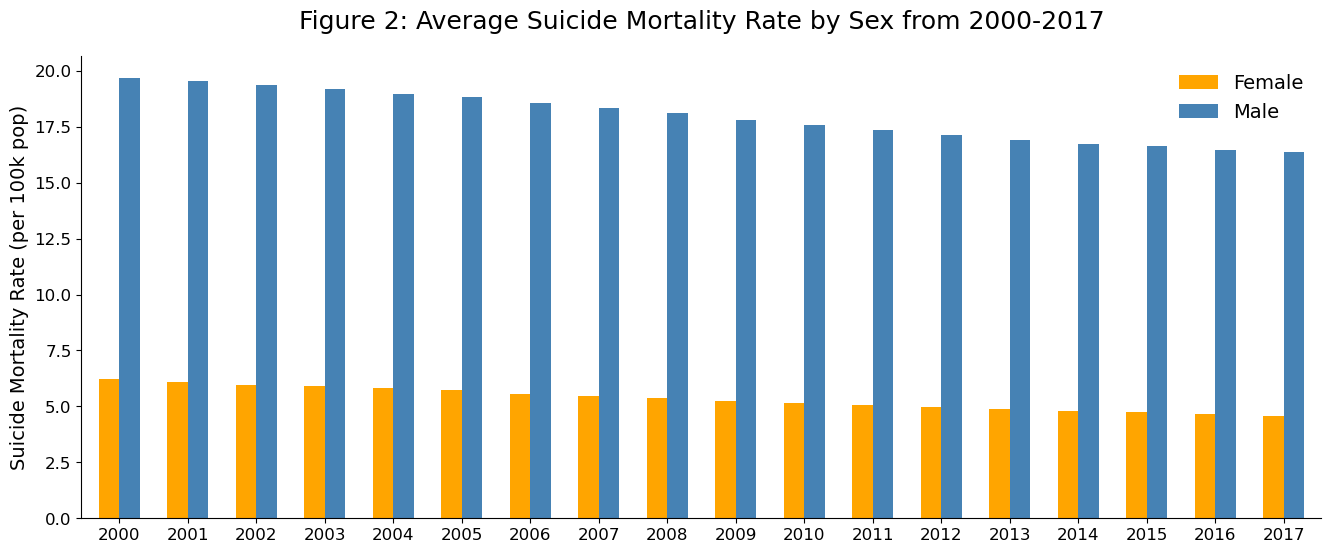

In [6]:
# Plotting
fig, ax = plt.subplots(figsize=(16,6))

avg_suicide_by_sex.plot.bar(ax=ax, x="Year", width=0.6, color=["orange", "#4682B4"], stacked=False)

ax.set_xlabel('')
ax.set_ylabel('Suicide Mortality Rate (per 100k pop)', fontsize=14)
ax.set_title('Figure 2: Average Suicide Mortality Rate by Sex from 2000-2017', fontsize=18, pad=20)
plt.xticks(rotation = 360)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="upper right", frameon = False, fontsize=14)

sns.despine()

plt.savefig('figure/Figure 2.svg', bbox_inches = 'tight')

## Q3: How did the world suicide mortality rate change by age groups from 2000-2019?

In [7]:
# Calculating the average world suicide mortality rate by age groups for each year
avg_suicide_by_age = suicide_by_age[["Year", "70+ years", "50-69 years", "15-49 years", "5-14 years", "Age-standardized"]].groupby("Year").mean()
avg_suicide_by_age = avg_suicide_by_age.reset_index()
avg_suicide_by_age = avg_suicide_by_age.iloc[10:]
avg_suicide_by_age = avg_suicide_by_age.drop(["Age-standardized"], axis=1)
cols = ["Year", "5-14 years", "15-49 years", "50-69 years", "70+ years"]
avg_suicide_by_age = avg_suicide_by_age[cols]

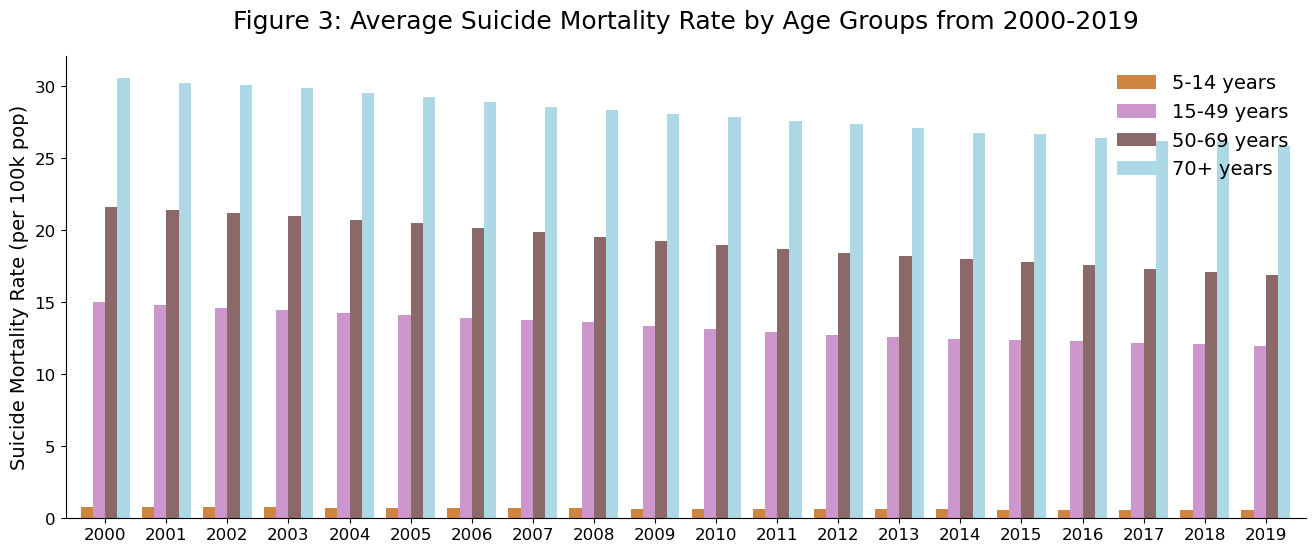

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(16,6))

avg_suicide_by_age.plot.bar(ax=ax, x="Year", width=0.8, color=["#CD853F", "#CD96CD", "#8B6969", "lightblue"], stacked=False)

ax.set_xlabel('')
ax.set_ylabel('Suicide Mortality Rate (per 100k pop)', fontsize=14)
ax.set_title('Figure 3: Average Suicide Mortality Rate by Age Groups from 2000-2019', fontsize=18, pad=20)
plt.xticks(rotation = 360)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc="upper right", frameon = False, fontsize=14)

sns.despine()

plt.savefig('figure/Figure 3.svg', bbox_inches = 'tight')

### **From here, we want to focus on the world suicide mortality rate in 2019 specifically because 2019 is the latest year in our data.**

## Suicide Mortality Rate World Map in 2019

In [9]:
# Loading World GeoDataFrame
path = gpd.datasets.get_path("naturalearth_lowres")
world = gpd.read_file(path)
world = world.rename(columns = {"iso_a3":"Code"})

# Getting 2019 suicide death rate 
suicide_2019 = suicide[suicide["Year"] == pd.to_datetime("2019-01-01")]

# Merging world and suicide_2019
world_suicide_2019 = pd.merge(world, suicide_2019, on="Code", how="inner")

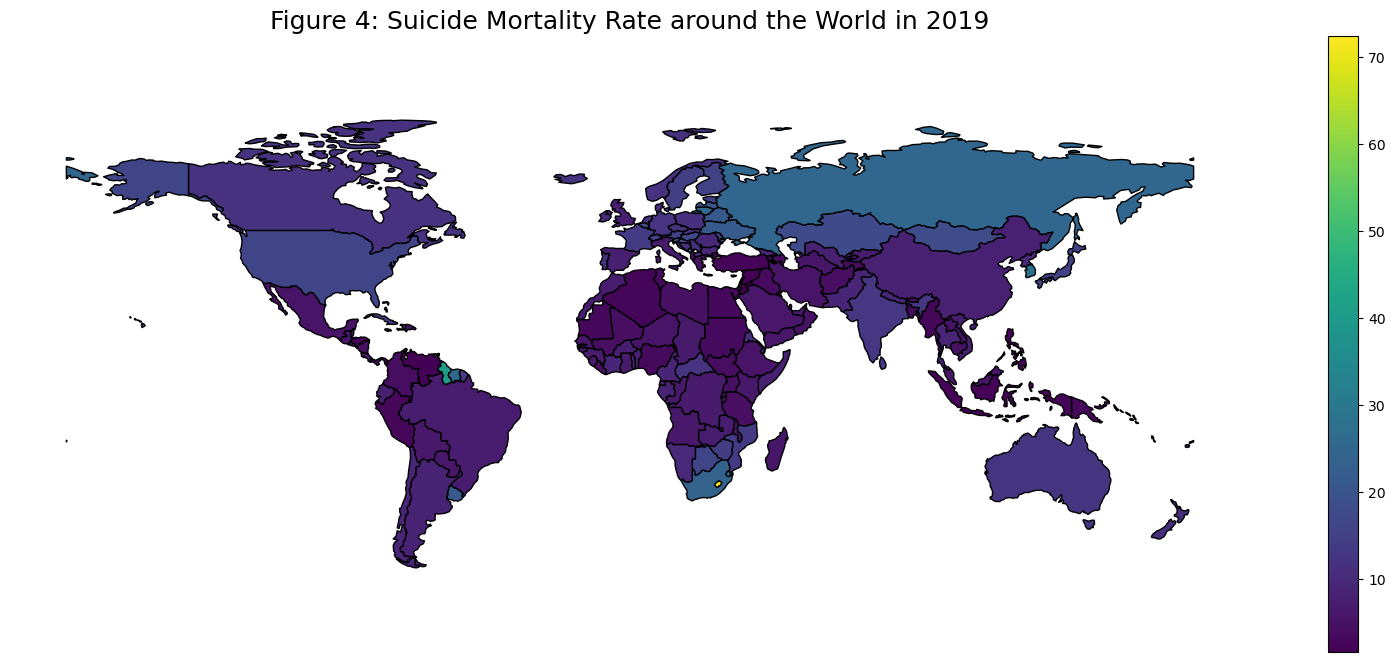

In [10]:
# Plotting
fig, ax = plt.subplots(figsize=(20,8))

world_suicide_2019.plot(ax=ax, column="Suicide mortality rate (per 100,000 population)", edgecolor="black", legend=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis('off')

ax.set_title('Figure 4: Suicide Mortality Rate around the World in 2019', fontsize=18, pad=50)

plt.savefig('figure/Figure 4.svg', bbox_inches = 'tight')

In [11]:
suicide_2019 = suicide_2019.sort_values(by="Suicide mortality rate (per 100,000 population)", ascending=False)
top5 = suicide_2019.head(5)
dfi.export(top5, "figure/Table 1.png")

objc[29277]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa4c1d9aa0) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/107.0.5304.121/Libraries/libGLESv2.dylib (0x110092ed8). One of the two will be used. Which one is undefined.
[1204/212605.467465:INFO:headless_shell.cc(657)] Written to file /var/folders/3x/9s0j281d20q279hpymb4cwfr0000gn/T/tmpxmc5boks/temp.png.


In [12]:
top5

,Entity,Code,Year,"Suicide mortality rate (per 100,000 population)"
2399,Lesotho,LSO,2019-01-01,72.4
1699,Guyana,GUY,2019-01-01,40.3
1279,Eswatini,SWZ,2019-01-01,29.4
3899,South Korea,KOR,2019-01-01,28.6
2179,Kiribati,KIR,2019-01-01,28.3


In 2019, top 5 countries with the greatest suicide mortality rate are: 
1. Lesotho
2. Guyana
3. Eswatini
4. South Korea
5. Kiribati

## Q4: What is the relationship between GDP per capita and suicide mortality rate (2019)?

In [13]:
# Inner join the suicide dataset with the GDP dataset
GDP_2019 = GDP[GDP["Year"] == pd.to_datetime("2019-01-01")]
combined = pd.merge(suicide_2019, GDP_2019, on=["Entity", "Code", "Year"], how="inner")

# Inner join the above dataset with the population dataset for 2019
population_2019 = population[population["Year"] == 2019]
combined = pd.merge(combined, population_2019, on=["Entity", "Code"], how="inner")
combined.drop(["Year_y"], axis=1)
combined = combined.rename(columns={"Year_x": "Year",
                                    "Suicide mortality rate (per 100,000 population)": "Suicide",
                                    "GDP per capita": "GDP"})

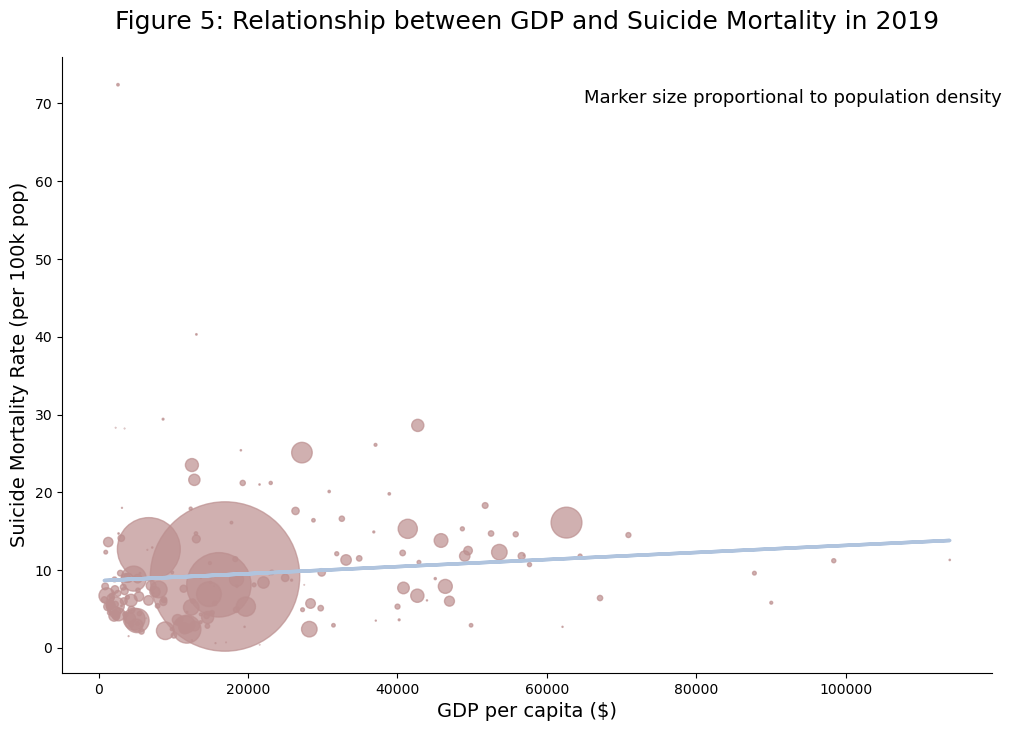

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(combined["GDP"], combined["Suicide"], 
           s = combined["Population"]*0.0000015, alpha=0.7, color="rosybrown")

# Plot a fitted line
m, b = np.polyfit(combined["GDP"], combined["Suicide"], 1)
plt.plot(combined["GDP"], m*combined["GDP"] + b, color="lightsteelblue", linewidth=2.5)

ax.set_xlabel('GDP per capita ($)', fontsize=14)
ax.set_ylabel('Suicide Mortality Rate (per 100k pop)', fontsize=14)
ax.set_title('Figure 5: Relationship between GDP and Suicide Mortality in 2019', fontsize=18, pad=20)
ax.text(65000, 70, 'Marker size proportional to population density', fontsize=13) 

sns.despine()

plt.savefig('figure/Figure 5.svg', bbox_inches = 'tight')

Performing a linear regression between GDP per capita and suicide mortality rate:

In [15]:
results = smf.ols('Suicide ~ GDP', data=combined).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Suicide   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.449
Date:                Sun, 04 Dec 2022   Prob (F-statistic):              0.119
Time:                        21:26:05   Log-Likelihood:                -618.81
No. Observations:                 177   AIC:                             1242.
Df Residuals:                     175   BIC:                             1248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6213      0.848     10.171      0.0

## Multiple Regression

In [16]:
# Combining datasets
unemploy_2019 = unemploy[unemploy["Year"] == pd.to_datetime("2019-01-01")]
combined = pd.merge(combined, unemploy_2019, on=["Entity", "Code", "Year"], how="inner")
combined.drop(["Year_y"], axis=1)
combined = combined.rename(columns={"Unemployment Rate": "Unemployment"})

happy_2019 = happy[happy["Year"] == pd.to_datetime("2019-01-01")]
combined = pd.merge(combined, happy_2019, on=["Entity", "Code", "Year"], how="inner")
combined.drop(["Year_y"], axis=1)
combined = combined.rename(columns={"Life Satisfaction": "Satisfaction"})

depression_2019 = depression[depression["Year"] == pd.to_datetime("2019-01-01")]
combined = pd.merge(combined, depression, on=["Entity", "Code", "Year"], how="inner")
combined = combined.drop(["Year_y"], axis=1)

In [17]:
# Multiple Regression
results = smf.ols('Suicide ~ GDP + Unemployment + Satisfaction + Depression', data=combined).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Suicide   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4.969
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           0.000919
Time:                        21:26:05   Log-Likelihood:                -468.33
No. Observations:                 137   AIC:                             946.7
Df Residuals:                     132   BIC:                             961.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        8.5059      4.540      1.874   